**Multiclass Classification Menggunakan Extreme Gradient Boosting Untuk Memprediksi Kerusakan Independen Pada Mesin**

btw buat tuningnya hati2 ges yang HYPEROPT jangan dirun ulang karna nanti parameternya beda :(

# Workflow



Dataset

---

This synthetic dataset is modeled after an existing milling machine and consists of 10 000 data points from a stored as rows with 14 features in columns

*   UID: unique identifier ranging from 1 to 10000
*   product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
*   type: just the product type L, M or H from column 2
*   air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
*   process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
*   rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
*   torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
*   tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes

*   tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
*   heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
*   power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
*   overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
*   random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.


**CRISP-DM**

1.   Business Understanding
    
    Perusahaan X menemukan sering terjadi kerusakan mesin (machine failure) pada saat berjalannya produksi yang mengakibatkan munculnya biaya - biaya tambahan guna menghadapi masalah tersebut. Biaya - biaya tambahan ini menyebabkan perusahaan X dinilai belum layak untuk melakukan penambahan kapasitas produksi dan melakukan ekspansi bisnis ke pasar mancanegara. Setelah diteliti lebih lanjut, machine failure yang dapat terjadi pada mesin perusahaan X terdiri dari 5 jenis independent failures. Independent failures yang terjadi yaitu tool wear failures, heat dissipation failures, power failures, overstrain failures, dan random failures. Sebagai upaya untuk meminimalisir hal ini, direktur produksi mengusulkan dibuatnya model yang dapat memprediksi terjadinya independent failures tersebut. Model prediksi tersebut bisa dijadikan acuan untuk kapan saatnya mesin mengalami maintenance sehingga tidak terjadi downtime.

2.   Data Understanding

    Diperoleh himpunan data sintetis yang terdiri dari 10.000 baris dan 14 fitur dengan lima kerusakan independen. Untuk dapat memahami dataset lebih baik, dilakukan proses EDA yang memberikan gambaran mengenai fitur apa saja yang harus dihapus dan bagaimana cara kita melakukan analisis terhadap dataset tersebut.

3.   Data Preparation
    Dataset perlu melewati beberapa tahap sebelum dapat dilakukan pembuatan model, yaitu beberapa fitur pada data akan dihapus, data akan mengalami tahap pengecekan terhadap missing value, duplikasi, dan outlier,dilakukan pengecekan tipe data, pengecekan distribusi, pemilihan feature - feature yang diperlukan, pengecekan terhap kelas dari data (apakah terdapat imbalanced data).
  
4.   Modeling
    Pada kasus kali ini, analisis yang mungkin digunakan adalah analisis menggunakan machine learning untuk mendeteksi machine failure. Analisis yang digunakan adalah XG boost. Penentuan analisis mana yang digunakan akan dilihat berdasar nilai ... . Tujuan dari semua analisis tersebut sama, yaitu untuk membentuk model prediksi apakah dengan kriteria tertentu perusahaan tersebut akan mengalami kebangkrutan atau tidak. Sebelum membentuk model, dataset perlu dibersihkan, dibagi menjadi data training dan testing. Data yang selanjutnya akan digunakan untuk pembentukan model adalah data train. Pembentukan model menggunakan fitur hasil dari feature engineering. Setelah model selesai dibentuk, dilihat seberapa besar nilai ... yang dihasilkan untuk menentukan performansi dari model tersebut.

5.   Visualization and Deployment

    Visualisasi insights dengan Power BI sehingga dapat menampilkan secara efektif dan efisien prediksi dari machine failure menggunakan what if analysis.

#Library

In [ ]:
# General Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter

import warnings
warnings.filterwarnings(action="ignore")

# EDA Libraries
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

# Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

# Machine Learning Libraries
import sklearn
from sklearn import preprocessing
from statistics import stdev
from scipy import stats
from sklearn import tree
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample #for Bootstrap sampling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.metrics import recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, hamming_loss
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.2 MB/s eta 0:00:00


# Data

In [ ]:
failure = pd.read_csv("ai4i2020.csv", delimiter=',')

# EDA

## Automated EDA

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 33.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

DataPrep Report
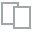
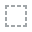
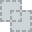
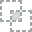
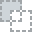
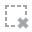
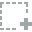
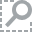
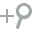
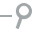
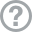
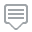
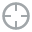
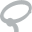
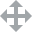
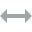
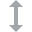
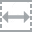
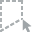
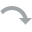
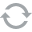
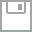
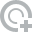
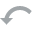
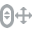
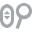
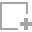
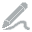
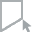
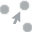
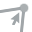
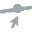

In [ ]:
from dataprep.eda import create_report
create_report(failure)

## Manual EDA

### Information about data

In [ ]:
failure.head(5)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [ ]:
failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
failure.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

### Missing Value

In [ ]:
failure.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Dapat disimpulkan bahwa tidak terdapat missing value pada setiap feature

### Duplicates

In [ ]:
failure.duplicated().sum()

0

Dapat disimpulkan bahwa tidak terdapat data yang merupakan duplikasi

### Machine Faiure

In [ ]:
failure['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [ ]:
ind_failure = failure[['TWF',	'HDF',	'PWF',	'OSF',	'RNF']]
for i in ind_failure:
  print('Kegagalan Mesin Tipe', i, 'berjumlah', failure[i].sum())

Kegagalan Mesin Tipe TWF berjumlah 46
Kegagalan Mesin Tipe HDF berjumlah 115
Kegagalan Mesin Tipe PWF berjumlah 95
Kegagalan Mesin Tipe OSF berjumlah 98
Kegagalan Mesin Tipe RNF berjumlah 19


In [ ]:
failure.loc[(failure['Machine failure'] == 1) & (failure['TWF'] == 0) & (failure['HDF'] == 0) & (failure['PWF'] == 0) & (failure['OSF'] == 0) & (failure['RNF'] == 0)]

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
1437  1438     H30851    H                298.8                    309.9   
2749  2750     M17609    M                299.7                    309.2   
4044  4045     M18904    M                301.9                    310.9   
4684  4685     M19544    M                303.6                    311.8   
5536  5537     M20396    M                302.3                    311.8   
5941  5942     L53121    L                300.6                    310.7   
6478  6479     L53658    L                300.5                    309.8   
8506  8507     L55686    L                298.4                    309.6   
9015  9016     L56195    L                297.2                    308.1   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1437                    1439         45.2               40                1   
2749                    1685         28.9              179                1   
4044                    1419         47.7               20                1   
4684                    1421         44.8              101                1   
5536                    1363         54.0              119                1   
5941                    1438         48.5               78                1   
6478                    1663         29.1              145                1   
8506                    1710         27.3              163                1   
9015                    1431         49.7              210                1   

      TWF  HDF  PWF  OSF  RNF  
1437    0    0    0    0    0  
2749    0    0    0    0    0  
4044    0    0    0    0    0  
4684    0    0    0    0    0  
5536    0    0    0    0    0  
5941    0    0    0    0    0  
6478    0    0    0    0    0  
8506    0    0    0    0    0  
9015    0    0    0    0    0

In [ ]:
failure.loc[(failure['TWF'] == 1) & (failure['HDF'] == 1)]

Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []

In [ ]:
failure.loc[(failure['TWF'] == 1) & (failure['PWF'] == 1)]

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
5909  5910     H35323    H                300.7                    310.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
5909                    1364         65.3              208                1   

      TWF  HDF  PWF  OSF  RNF  
5909    1    0    1    1    0

In [ ]:
failure.loc[(failure['TWF'] == 1) & (failure['OSF'] == 1)]

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
5401  5402     M20261    M                302.6                    312.3   
5909  5910     H35323    H                300.7                    310.2   
8846  8847     M23706    M                297.4                    308.8   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
5401                    1454         54.8              253                1   
5909                    1364         65.3              208                1   
8846                    1325         62.4              204                1   

      TWF  HDF  PWF  OSF  RNF  
5401    1    0    0    1    0  
5909    1    0    1    1    0  
8846    1    0    0    1    0

In [ ]:
failure.loc[(failure['TWF'] == 1) & (failure['RNF'] == 1)]

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
3611  3612     L50791    L                301.7                    310.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
3611                    1405         46.4              207                1   

      TWF  HDF  PWF  OSF  RNF  
3611    1    0    0    0    1

In [ ]:
failure.loc[(failure['HDF'] == 1) & (failure['PWF'] == 1)]

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
4254  4255     L51434    L                302.6                    311.0   
4342  4343     M19202    M                301.7                    309.8   
4417  4418     L51597    L                302.6                    310.4   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
4254                    1284         68.0              114                1   
4342                    1284         68.2              111                1   
4417                    1365         66.8               80                1   

      TWF  HDF  PWF  OSF  RNF  
4254    0    1    1    0    0  
4342    0    1    1    0    0  
4417    0    1    1    0    0

In [ ]:
failure.loc[(failure['HDF'] == 1) & (failure['OSF'] == 1)]

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
4370  4371     L51550    L                302.0                    309.9   
4383  4384     L51563    L                301.7                    309.5   
4462  4463     L51642    L                302.7                    310.5   
4642  4643     L51822    L                303.2                    311.4   
4643  4644     L51823    L                303.2                    311.4   
4729  4730     L51909    L                303.4                    311.8   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
4370                    1308         57.6              197                1   
4383                    1298         65.5              229                1   
4462                    1263         67.8              197                1   
4642                    1238         54.6              226                1   
4643                    1324         54.2              228                1   
4729                    1306         61.0              215                1   

      TWF  HDF  PWF  OSF  RNF  
4370    0    1    0    1    0  
4383    0    1    0    1    0  
4462    0    1    0    1    0  
4642    0    1    0    1    0  
4643    0    1    0    1    0  
4729    0    1    0    1    0

In [ ]:
failure.loc[(failure['HDF'] == 1) & (failure['RNF'] == 1)]

Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []

In [ ]:
failure.loc[(failure['PWF'] == 1) & (failure['OSF'] == 1)]

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
69      70     L47249    L                298.9                    309.0   
1324  1325     M16184    M                298.8                    310.1   
1496  1497     L48676    L                298.0                    308.7   
3854  3855     L51034    L                302.4                    311.0   
3943  3944     L51123    L                302.3                    311.4   
5394  5395     M20254    M                302.8                    312.3   
5909  5910     H35323    H                300.7                    310.2   
6248  6249     L53428    L                300.8                    310.1   
7083  7084     L54263    L                300.7                    310.4   
8926  8927     M23786    M                297.3                    308.3   
9084  9085     L56264    L                297.2                    307.9   
9974  9975     L57154    L                298.6                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
69                      1410         65.7              191                1   
1324                    1243         74.5              194                1   
1496                    1268         69.4              189                1   
3854                    1338         67.6              194                1   
3943                    1333         66.7              205                1   
5394                    1262         70.5              234                1   
5909                    1364         65.3              208                1   
6248                    1405         61.2              189                1   
7083                    1416         61.8              209                1   
8926                    1459         59.6              207                1   
9084                    1326         75.4              172                1   
9974                    1361         68.2              172                1   

      TWF  HDF  PWF  OSF  RNF  
69      0    0    1    1    0  
1324    0    0    1    1    0  
1496    0    0    1    1    0  
3854    0    0    1    1    0  
3943    0    0    1    1    0  
5394    0    0    1    1    0  
5909    1    0    1    1    0  
6248    0    0    1    1    0  
7083    0    0    1    1    0  
8926    0    0    1    1    0  
9084    0    0    1    1    0  
9974    0    0    1    1    0

In [ ]:
failure.loc[(failure['PWF'] == 1) & (failure['RNF'] == 1)]

Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []

In [ ]:
failure.loc[(failure['OSF'] == 1) & (failure['RNF'] == 1)]

Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []

### Kesimpulan

Dari beberapa output di atas diperoleh beberapa kesimpulan sebagai berikut: 

*  Secara keseluruhan berdasarkan feature 'Machine failure', terdapat 9661 data yang bukan merupakan kerusakan mesin dan 339 data yang merupakan kerusakan mesin.
*  Total dari kerusakan mesin untuk kelima kategori kerusakan independen adalah sebanyak 373 yang berarti jumlah kerusakan mesin secara independen ini lebih besar dari total kerusakan mesin secara keseluruhan (feature 'Machine failure'). Oleh karena itu, bisa disimpulkan terdapat 1 kerusakan mesin yang memiliki lebih dari 1 kategori kerusakan independen.
*   Terdapat 9 data yang masuk ke dalam kategori kerusakan mesin berdasarkan feature 'Machine failure', tetapi tidak masuk dalam kelima kategori kerusakan independen.
*   Total dari kerusakan mesin yang memiliki lebih dari satu kategori kerusakan independen adalah TWF & PWF sebanyak 1 data, TWF & OSF sebanyak 3 data, TWF & RNF sebanyak 1 data, HDF & PWF sebanyak 3 data, dan PWF & OSF sebanyak 12 data.
*   Terdapat imbalanced class


---

Dari beberapa kesimpulan di atas akan lebih baik pada saat dilakukan analisis nanti target variable lebih dari satu yang terdiri dari beberapa kategori kerusakan independen untuk menghindari missclassification jika hanya digunakan 1 target variable. Selain itu, dibuat kolom baru seperti "Another value" yang berisi kesembilan data yang tidak masuk dalam kelima kategori kerusakan independen agar tidak mengurangi data yang dimiliki. Untuk menghindari hasil yang bias bisa juga dilakukan penanganan terhadap imbalanced class dari data.



###Visualisasi

Histogram

array([[<Axes: title={'center': 'UDI'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Machine failure'}>,
        <Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>],
       [<Axes: title={'center': 'PWF'}>, <Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'RNF'}>]], dtype=object)

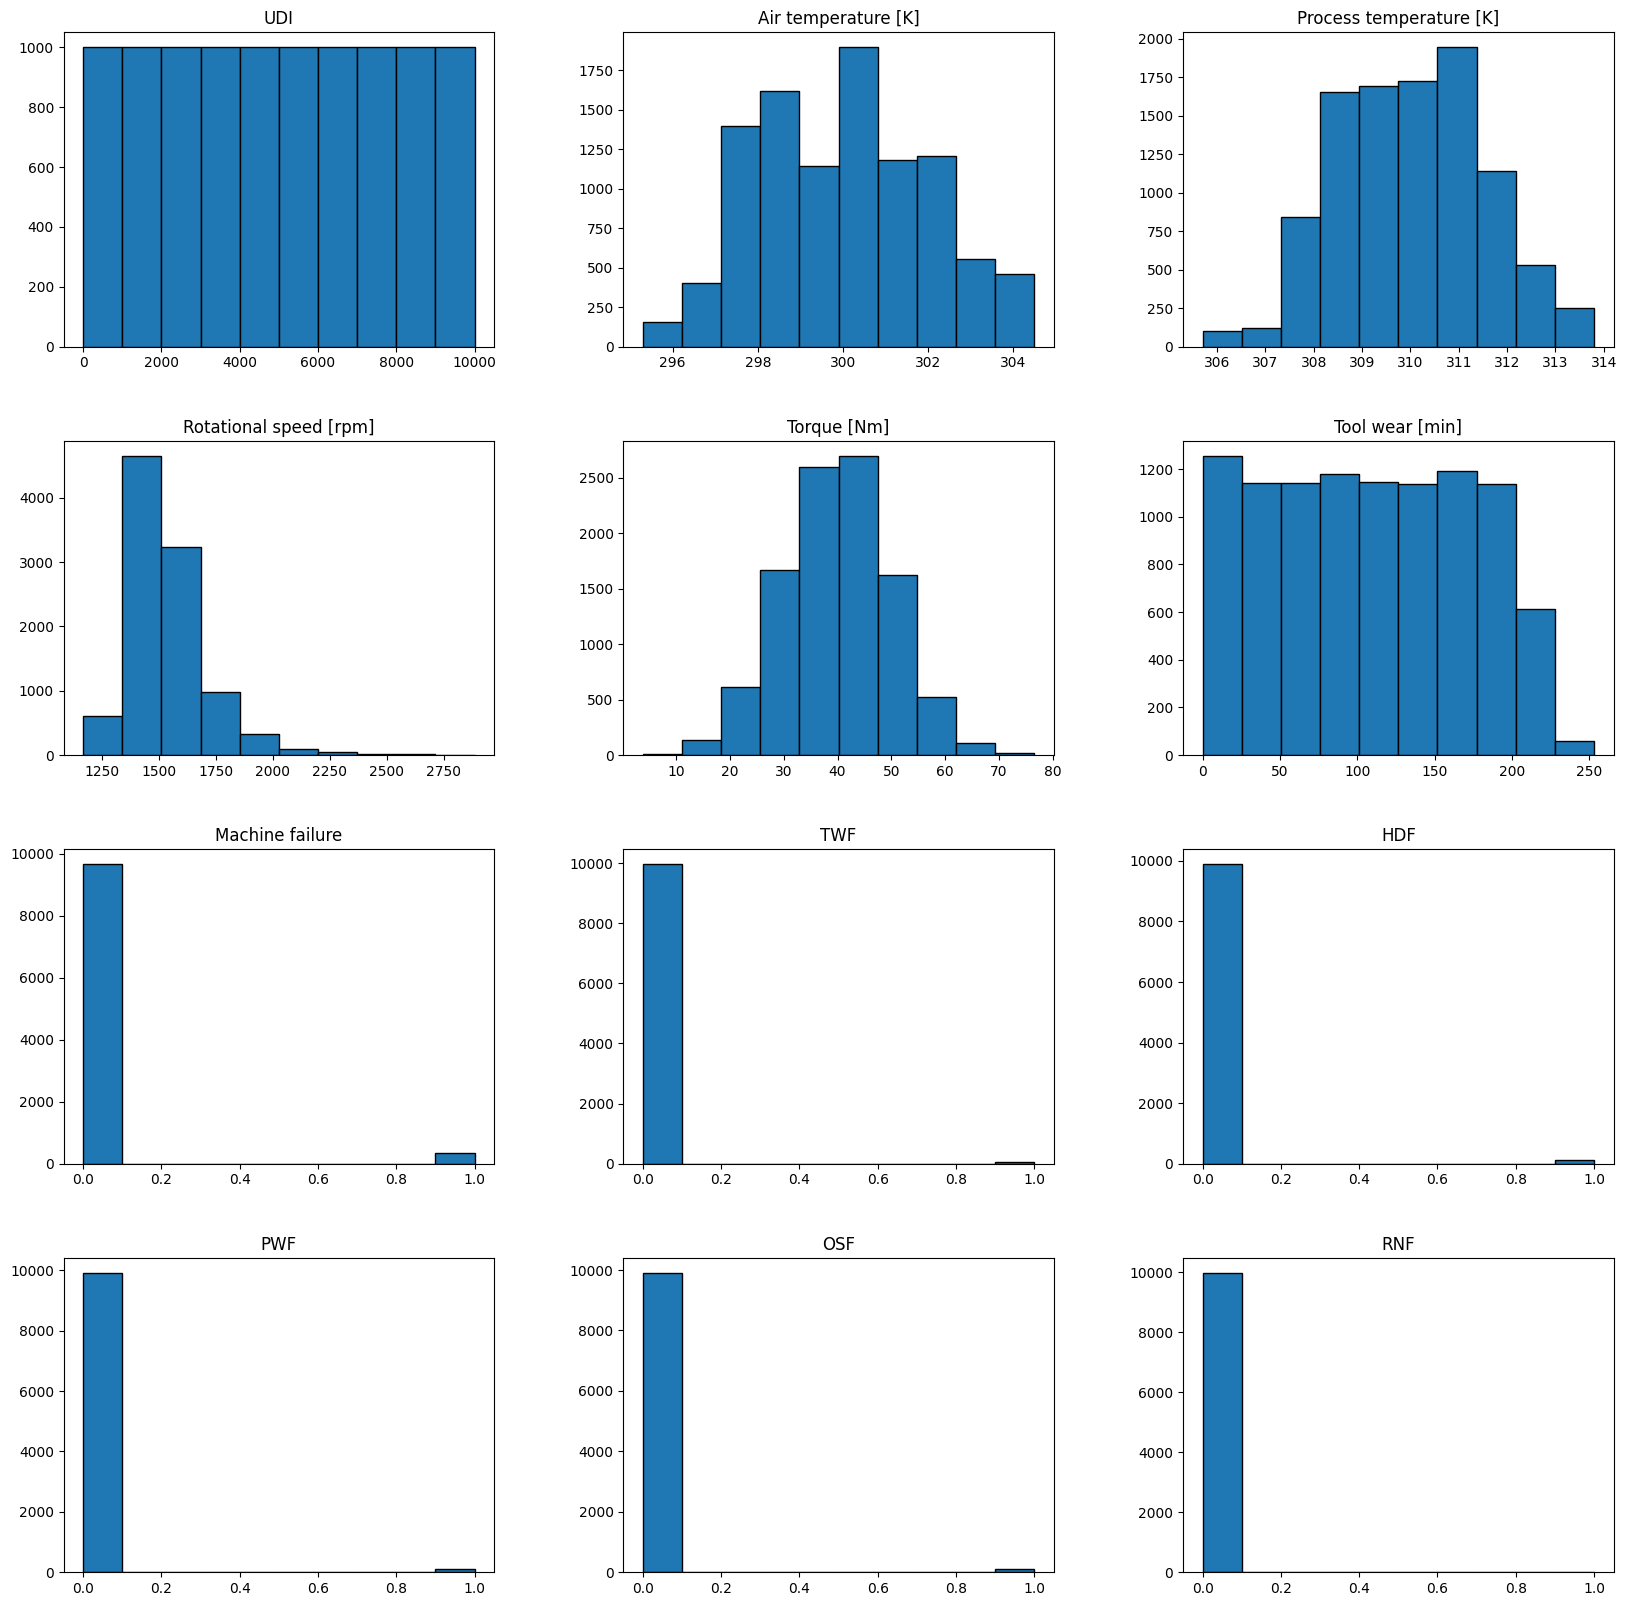

In [ ]:
#define format for subplots
fig, axis = plt.subplots(4, 3, figsize=(20,20))

#create histogram for each column in DataFrame
data.hist(ax=axis, edgecolor='black', grid=False)

Distribusi dari seluruh feature hanya Torque (Nm) yang memiliki distribusi paling mendekati distribusi normal, sedangkan yang lain jauh dari distribusi normal. Oleh karena itu, untuk analisis ke depan agar bisa menghasilakn performansi lebih baik mungkin dapat dilakukan standardisasi atau scaling.

Correlation

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

Terlihat terdapat beberapa feature yang memiliki korelasi>0.8. Nilai ini dapat digunakan untuk pemilihan feature yang akan digunakan berdasarkan threshold tertentu.

Box Plot

In [ ]:
data2=data.copy()

In [ ]:
#Dibuat contoh boxplot dengan variabel y adalah kerusakan tipe TWF
trace1  = go.Box(
    x=data2['TWF'],
    y=data2['Air temperature [K]'], 
    showlegend=False, visible=True
)
                        
trace2  = go.Box(
    x=data2['TWF'],
    y=data2['Process temperature [K]'], 
    showlegend=False, visible=False
)
                
trace3 = go.Box(
    x=data2['TWF'],
    y=data2['Rotational speed [rpm]'],
    showlegend=False, visible=False
)

trace4 = go.Box(
    x=data2['TWF'],
    y=data2['Torque [Nm]'],
    showlegend=False, visible=False
)

trace5 = go.Box(
    x=data2['TWF'],
    y=data2['Tool wear [min]'],
    showlegend=False, visible=False
)

data3 = [trace1, trace2, trace3, trace4, trace5]

updatemenus = list([
    dict(active=-1,
         x=-0.15,
         buttons=list([  
             
            dict(
                label = 'Air Temperature',
                 method = 'update',
                 args = [{'visible': [True, False, False, False]}, 
                     {'title': 'Feature Boxplot'}]),
             
             dict(
                  label = 'Process temperature',
                 method = 'update',
                 args = [{'visible': [False, True, False, False]},
                     {'title': 'Feature Boxplot'}]),

            dict(
                 label = 'Rotational speed',
                 method = 'update',
                 args = [{'visible': [False, False, True, False]},
                     {'title': 'Feature Boxplot'}]),

            dict(
                 label =  'Torque',
                 method = 'update',
                 args = [{'visible': [False, False, False, True]},
                     {'title': 'Feature Boxplot'}]),
            dict(
                 label =  'Tool wear',
                 method = 'update',
                 args = [{'visible': [False, False, False, True]},
                     {'title': 'Feature Boxplot'}])
        ]),
    )
])

layout = dict(title='Feature Boxplot TWF<br>(Select metrics from Dropdown)', 
              showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data3, layout=layout)

iplot(fig, filename='dropdown')

Berdasarkan boxplot di atas, berdasarkan kerusakan TWF banyak feature yang memiliki nilai outlier. Akan tetapi, nilai outlier tersebut banyak yang berasal dari machine failure 1 padahal data dari machine failure 1 cukup sedikit. Oleh karena itu, agar tidak mengurangi data yang ada, outlier ini bisa diabaikan atau ditangani dengan cara lain selain dihapus.

Pair Plot

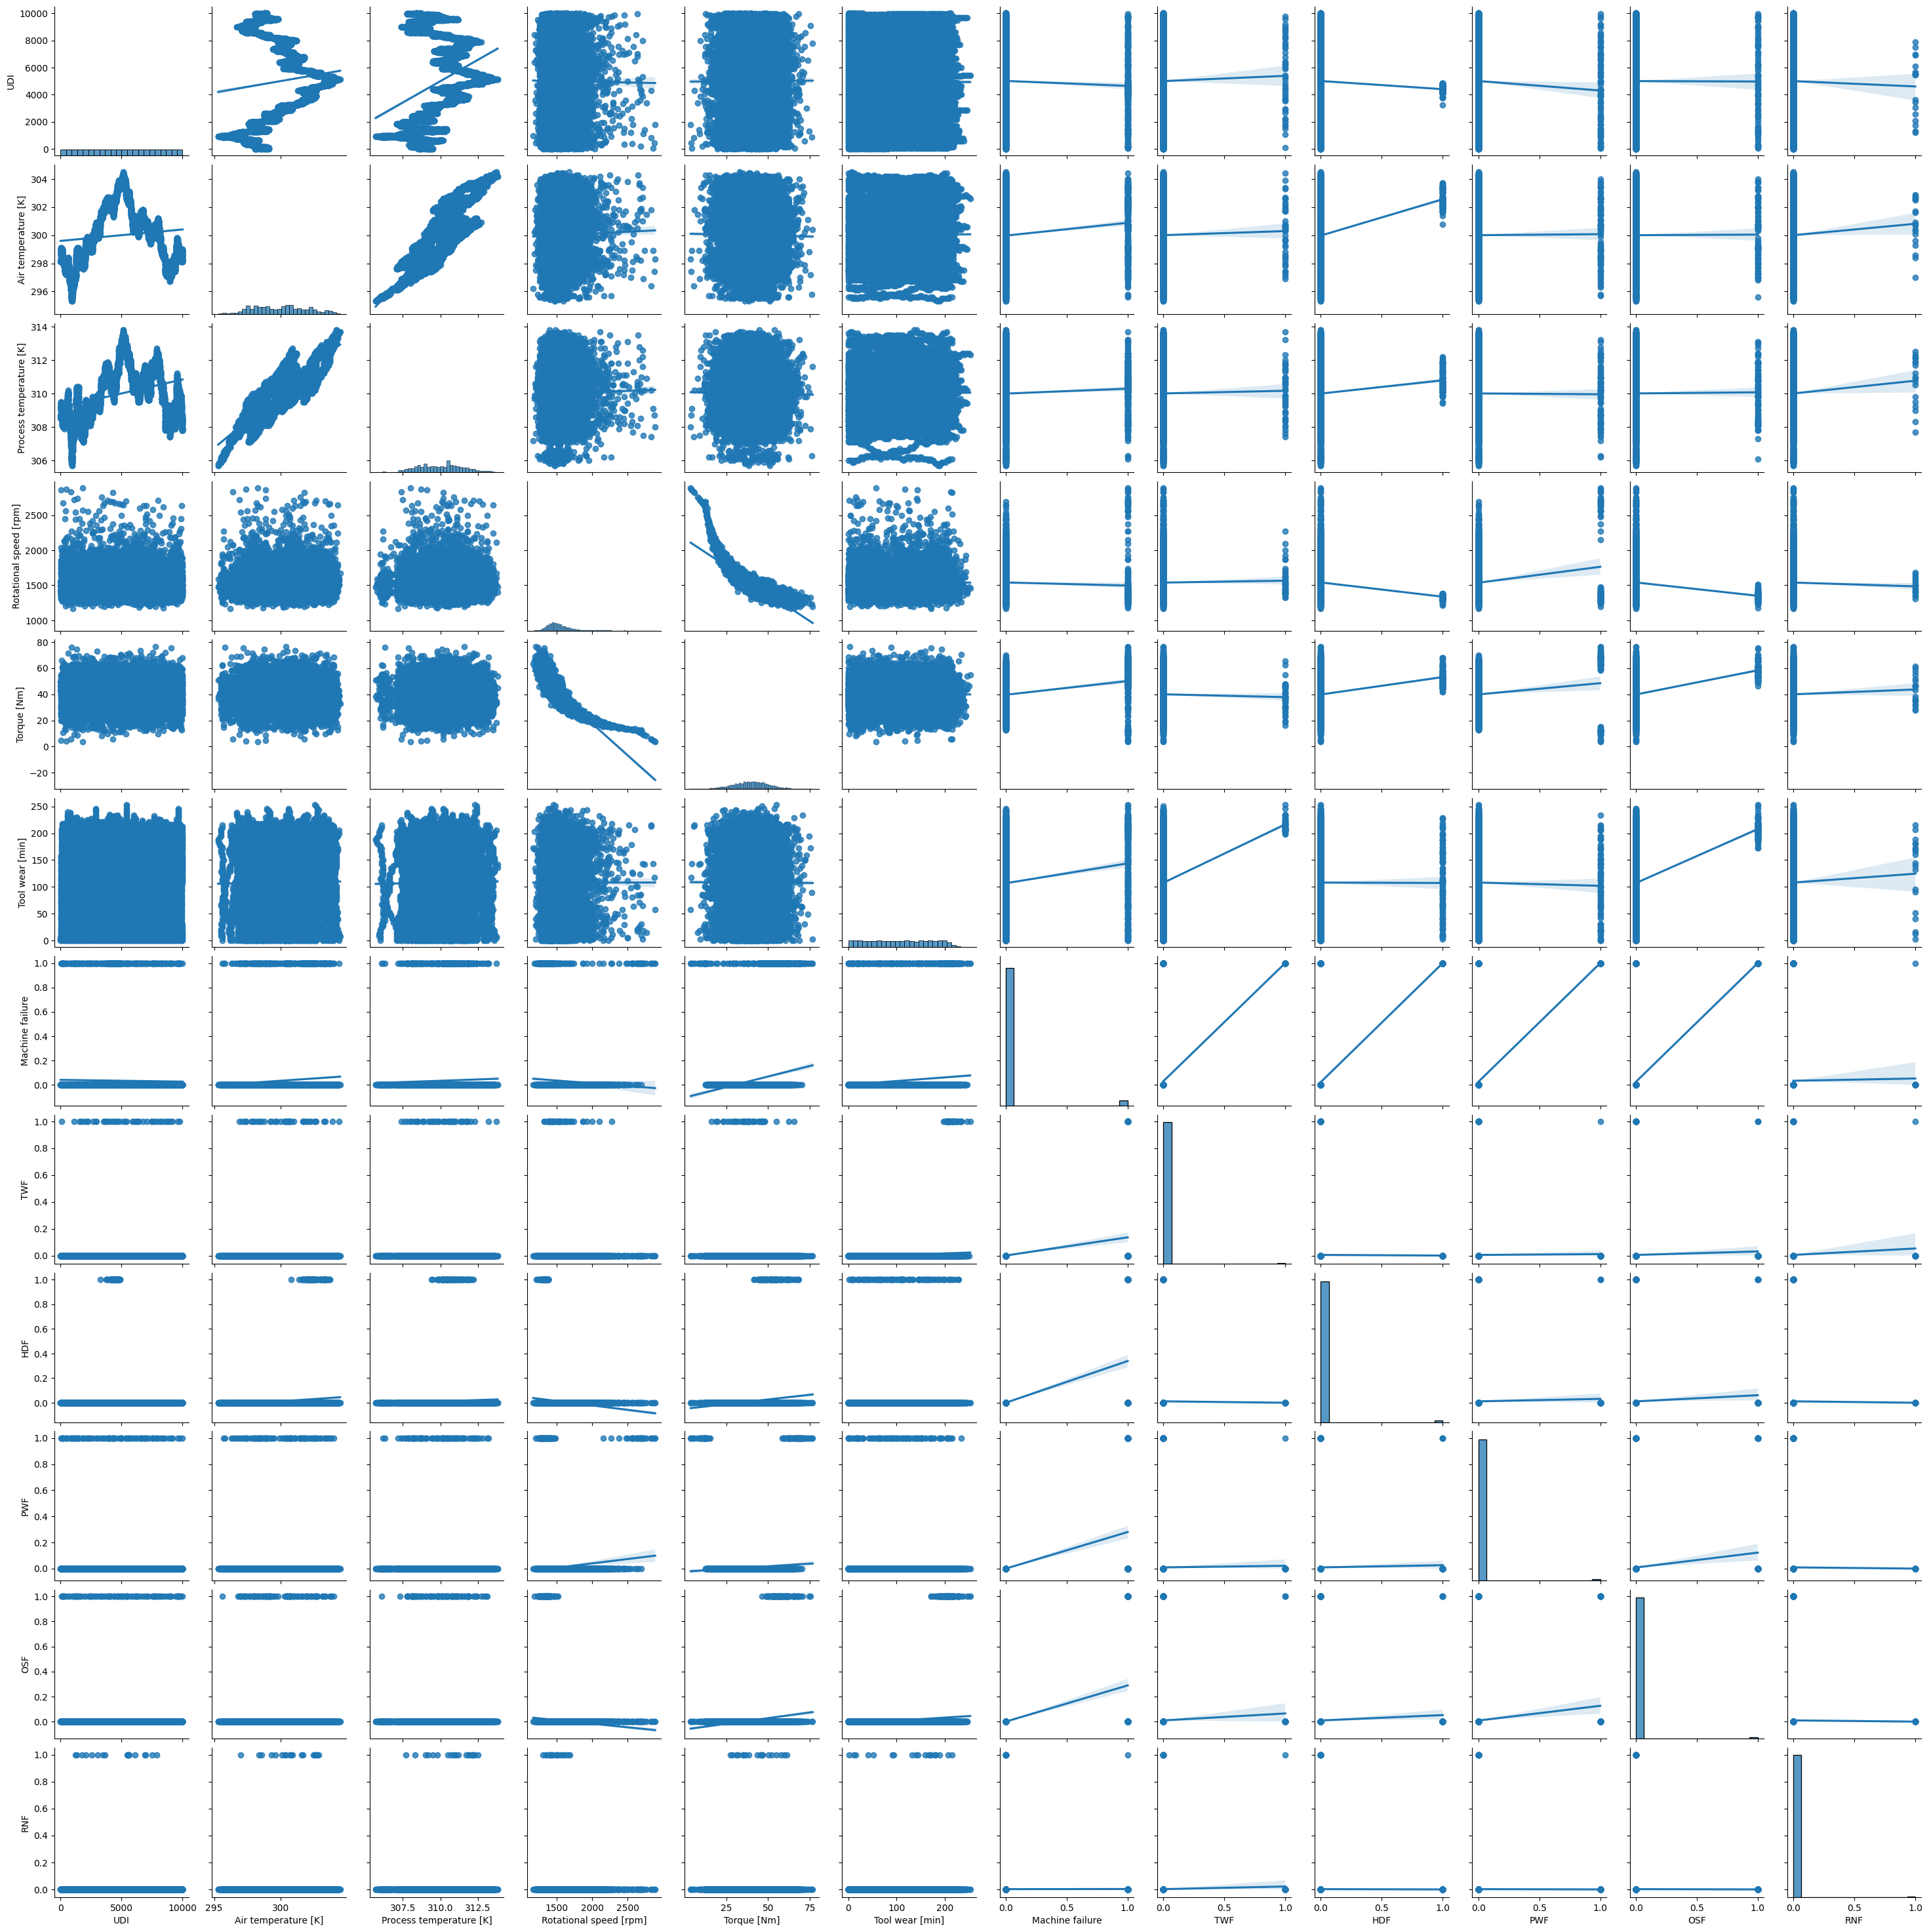

In [ ]:
#input your code here
sns.pairplot(data, kind = 'reg')

# Data Preparation

Proses preparation yang dilakukan adalah membuat variabel baru bernama "Another Failure", membuat dummy variable, dan melakukan problem transformation.

Outlier yang ada tidak akan dibuang atau diganti dengan nilai lain, seperti percentile, z-score, maupun iqr melainkan akan ditangani dengan menggunakan transformasi. Pemilihan transformasi sebagai cara penanganan outlier ini bertujuan agar nilai outlier tidak hilang begitu saja dan tidak tergantikan oleh nilai lain yang bisa menyebabkan perbedaan dengan data asli.

In [ ]:
failure

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

## Dummy

In [ ]:
data0=failure.drop(['Type'], axis=1)

In [ ]:
dms = pd.get_dummies(failure[['Type']])
dms.head()

Type_H  Type_L  Type_M
0       0       0       1
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0

In [ ]:
data = pd.concat([data0,dms], axis=1 )
data

UDI Product ID  Air temperature [K]  Process temperature [K]  \
0         1     M14860                298.1                    308.6   
1         2     L47181                298.2                    308.7   
2         3     L47182                298.1                    308.5   
3         4     L47183                298.2                    308.6   
4         5     L47184                298.2                    308.7   
...     ...        ...                  ...                      ...   
9995   9996     M24855                298.8                    308.4   
9996   9997     H39410                298.9                    308.4   
9997   9998     M24857                299.0                    308.6   
9998   9999     H39412                299.0                    308.7   
9999  10000     M24859                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  Type_H  Type_L  Type_M  
0       0    0    0    0    0       0       0       1  
1       0    0    0    0    0       0       1       0  
2       0    0    0    0    0       0       1       0  
3       0    0    0    0    0       0       1       0  
4       0    0    0    0    0       0       1       0  
...   ...  ...  ...  ...  ...     ...     ...     ...  
9995    0    0    0    0    0       0       0       1  
9996    0    0    0    0    0       1       0       0  
9997    0    0    0    0    0       0       0       1  
9998    0    0    0    0    0       1       0       0  
9999    0    0    0    0    0       0       0       1  

[10000 rows x 16 columns]

## Another Failure

In [ ]:
data.loc[(data['Machine failure'] == 1) & (data['TWF'] == 0) & (data['HDF'] == 0) & (data['PWF'] == 0) & (data['OSF'] == 0) & (data['RNF'] == 0), 'Another Failure'] = 1

In [ ]:
data=data.fillna(0)

## Problem Transformation

Problem Transformation adalah salah satu cara penanganan multi-label. Problem Transformation mengacu pada mengubah masalah multi-label menjadi masalah label tunggal. Problem Transformation dapat dilakukan dengan tiga cara, yaitu: Binary Relevance, Classifier Chains, dan PowerLabelSet. Pada kasus kali ini akan digunakan analisis menggunakan PowerLabelSet yang mana merupakan salah satu cara paling mudah dan simpel tanpa menghilangkan korelasi antar fitur.

PowerLabelSet mengubah multi-label problems menjadi multi-class problem dengan satu pengklasifikasi multi-class dilatih pada semua kombinasi label unik yang ditemukan dalam data training.

Untuk label power set pemilihan angka bebas yang penting hindari angka yang bisa memiliki jumlah sama, misalnya 1 2 3, bisa aja 3 itu dari 1 + 2 atau bisa juga dari angka 3 itu sendiri.

Amannya sih pake kelipatannya, kalo aku kelipatan 2, jadi 1 2 4 8 16 32

![image.png]()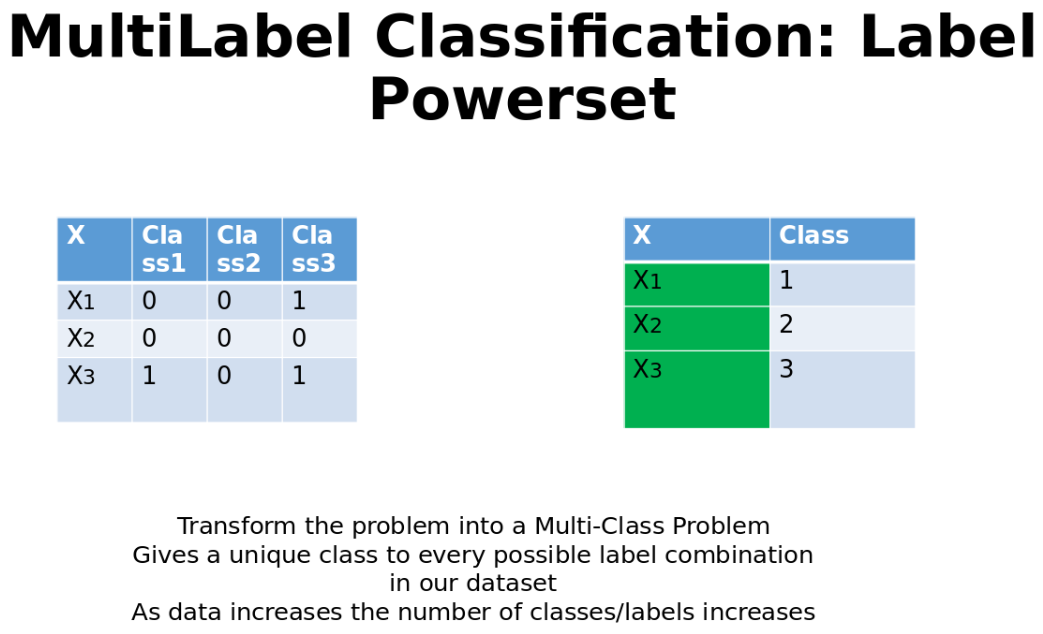

In [ ]:
#Applying Label Powerset Tranformation
data['powerlabel'] = data.apply(lambda x : 32*x["TWF"]+16*x["HDF"]+8*x["PWF"]+4*x["OSF"]+2*x["RNF"]+1*x["Another Failure"],axis=1)

In [ ]:
#Dilakukan penyesuaian terhadap kolom powerlabel agar dapat digunakan dalam algoritma XGB
data.loc[data['powerlabel'] == 0, 'powerlabel 2'] = 0
data.loc[data['powerlabel'] == 1, 'powerlabel 2'] = 1
data.loc[data['powerlabel'] == 2, 'powerlabel 2'] = 2
data.loc[data['powerlabel'] == 4, 'powerlabel 2'] = 3
data.loc[data['powerlabel'] == 8, 'powerlabel 2'] = 4
data.loc[data['powerlabel'] == 12, 'powerlabel 2'] = 5
data.loc[data['powerlabel'] == 16, 'powerlabel 2'] = 6
data.loc[data['powerlabel'] == 20, 'powerlabel 2'] = 7
data.loc[data['powerlabel'] == 24, 'powerlabel 2'] = 8
data.loc[data['powerlabel'] == 32, 'powerlabel 2'] = 9
data.loc[data['powerlabel'] == 34, 'powerlabel 2'] = 10
data.loc[data['powerlabel'] == 36, 'powerlabel 2'] = 11
data.loc[data['powerlabel'] == 44, 'powerlabel 2'] = 12

In [ ]:
for column in data.columns:
    if data[column].dtype == 'float64':
        data[column] = data[column].astype(int)
    elif data[column].dtype == 'uint8':
        data[column] = data[column].astype(int)

## Rename Column and Duplicate Dataset

Pengubahan nama kolom dimaksudkan agar bisa dilakukan analisis menggunakan XGBoost dan pembuatan duplikasi hasil data preparation dimaksudkan agar jika terjadi kesalahan tidak perlu mengulang dari awal.

In [ ]:
dataa = data.rename(columns={'Air temperature [K]': 'Air temperature', 
                             'Process temperature [K]': 'Process temperature',
                             'Rotational speed [rpm]': 'Rotational speed', 
                             'Torque [Nm]': 'Torque',
                             'Tool wear [min]': 'Tool wear'})

In [ ]:
data1 = dataa.copy()
data2 = dataa.copy()
data3 = dataa.copy()
data4 = dataa.copy()

# Baseline Model

## Splitting Dataset

In [ ]:
X = data1[['Air temperature',
           'Process temperature',
           'Rotational speed',
           'Torque',
           'Tool wear',
           'Type_L',
           'Type_M',
           'Type_H']]
y = data1[['powerlabel 2']]

In [ ]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, test_size=size, random_state=42)
    xgb_clf = XGBClassifier ()
    xgb_clf.fit(X_train1, y_train1)
    score.append (xgb_clf.score (X_test1, y_test1))

# Create a dataframe to display the results 
r = pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
print(r)

   Test size   Score
1       0.25  0.9796
2       0.30  0.9790
0       0.20  0.9770


Berdasarkan hasil di atas akan digunakan pembagian data train dan data test sebanyak 75% data training dan 25% data testing

In [ ]:
train_data, test_data = train_test_split(data1, test_size=0.25, random_state=42)
test_data.to_csv("test.csv")
train_data.to_csv("train.csv")

In [ ]:
train = pd.read_csv('train.csv')
X_train = train[['Air temperature',
           'Process temperature',
           'Rotational speed',
           'Torque',
           'Tool wear',
           'Type_L',
           'Type_M',
           'Type_H']]
y_train = train[['powerlabel 2']]

test = pd.read_csv('test.csv')
X_test = test[['Air temperature',
           'Process temperature',
           'Rotational speed',
           'Torque',
           'Tool wear',
           'Type_L',
           'Type_M',
           'Type_H']]
y_test = test[['powerlabel 2']]

print("Number of training data ", train.shape[0])
print("Number of testing data: ", test.shape[0])

Number of training data  7500
Number of testing data:  2500


In [ ]:
y_test.value_counts()

powerlabel 2
0               2422
6                 20
4                 17
3                 15
9                 11
2                  6
5                  4
1                  2
8                  2
11                 1
dtype: int64

In [ ]:
y_train.value_counts()

powerlabel 2
0               7221
6                 86
3                 63
4                 63
9                 31
2                 12
1                  7
5                  7
7                  6
8                  1
10                 1
11                 1
12                 1
dtype: int64

## Transformation

Dengan menggunakan Transformation, dampak dari satu titik 
outlier pada variabel independen dapat dikurangi.

Transformation method yang digunakan pada kasusu kali ini adalah QuantileTransformer. QuantileTransformer menerapkan transformasi non-linear sehingga fungsi kerapatan probabilitas dari setiap fitur akan dipetakan ke uniform atau Gaussian distribution. Dalam hal ini, semua data, termasuk outlier, akan dipetakan ke distribusi uniform dengan rentang [0, 1], making outliers indistinguishable from inliers.

Transformasi diterapkan pada setiap fitur secara independen. Pertama, perkiraan fungsi distribusi kumulatif fitur digunakan untuk memetakan nilai asli ke distribusi yang seragam. Nilai yang diperoleh kemudian dipetakan ke distribusi output yang diinginkan menggunakan fungsi kuantil terkait. Nilai fitur data baru / tak terlihat yang berada di bawah atau di atas rentang yang dipasang akan dipetakan ke batas distribusi output. 

Kami menggunakan QuantileTransformer dikarenakan kami ingin nilai outlier tidak dibuang, tetapi hasil klasifikasi yang dibentuk tidak terlalu dipengaruhi juga oleh nilai outlier tersebut. Menggunakan QuantileTransformer, outlier tidak membentuk kelas baru yang independen dari kelas yang ada dan berbaur "secara alami" ke dalam kelas.

In [ ]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))

    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])    

In [ ]:
cols=list(train[['Air temperature',
           'Process temperature',
           'Rotational speed',
           'Torque',
           'Tool wear',
           'Type_L',
           'Type_M',
           'Type_H']])

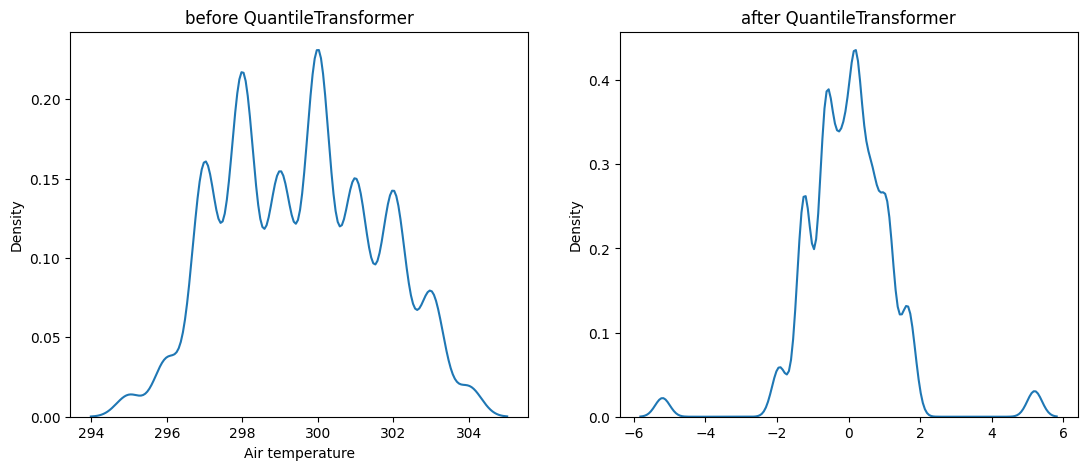

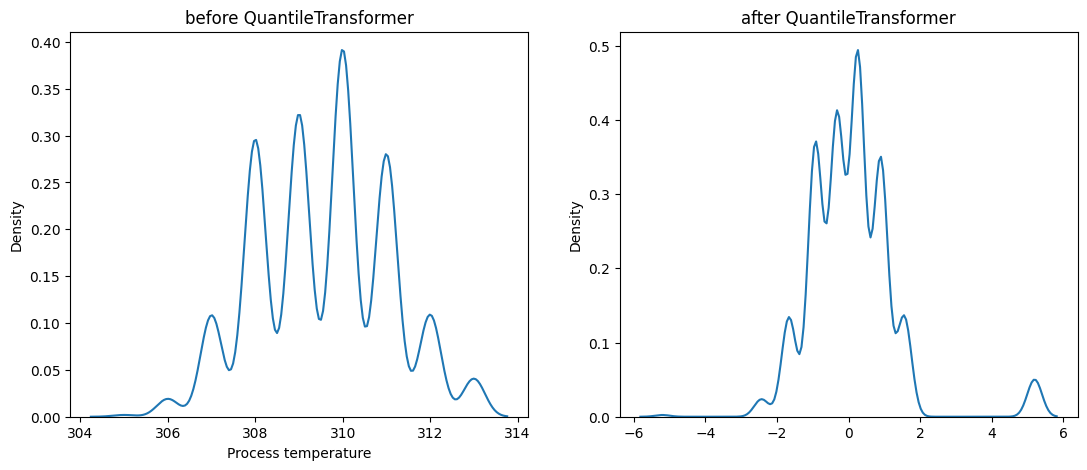

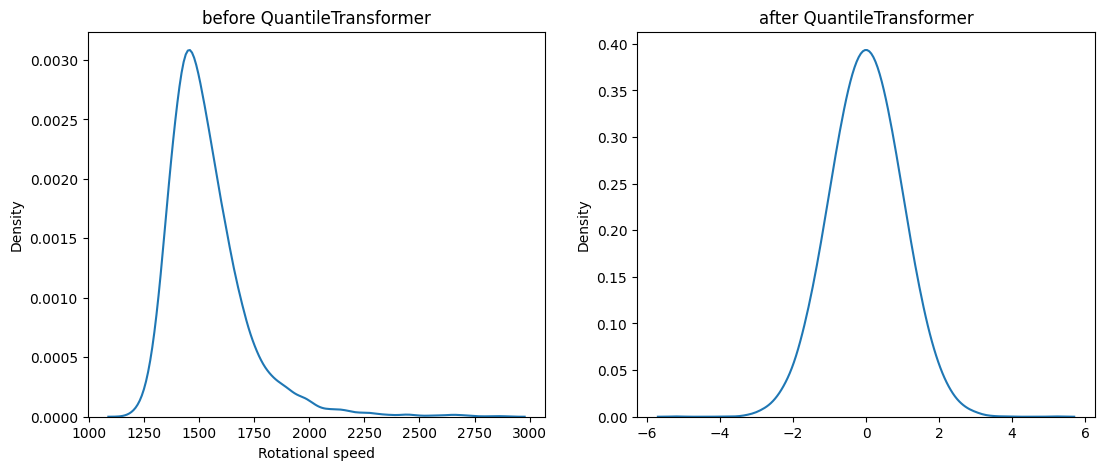

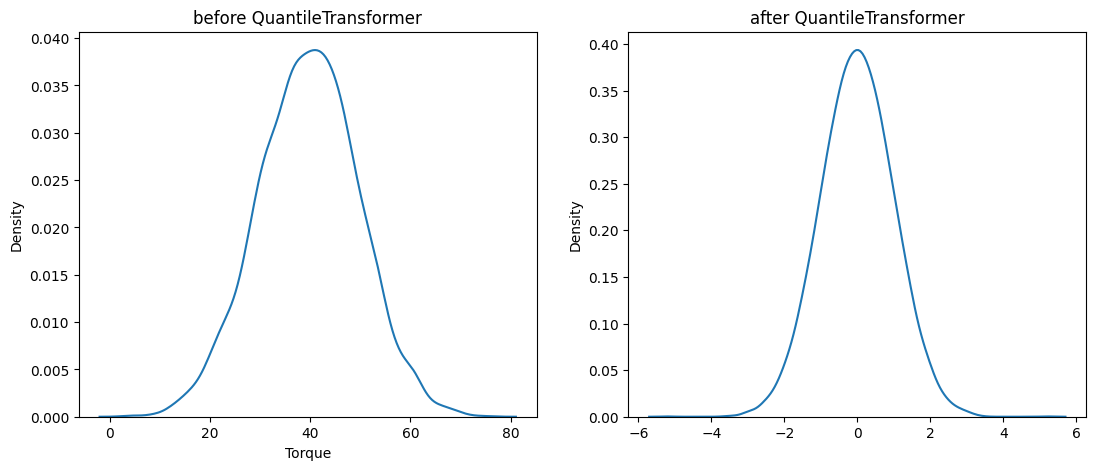

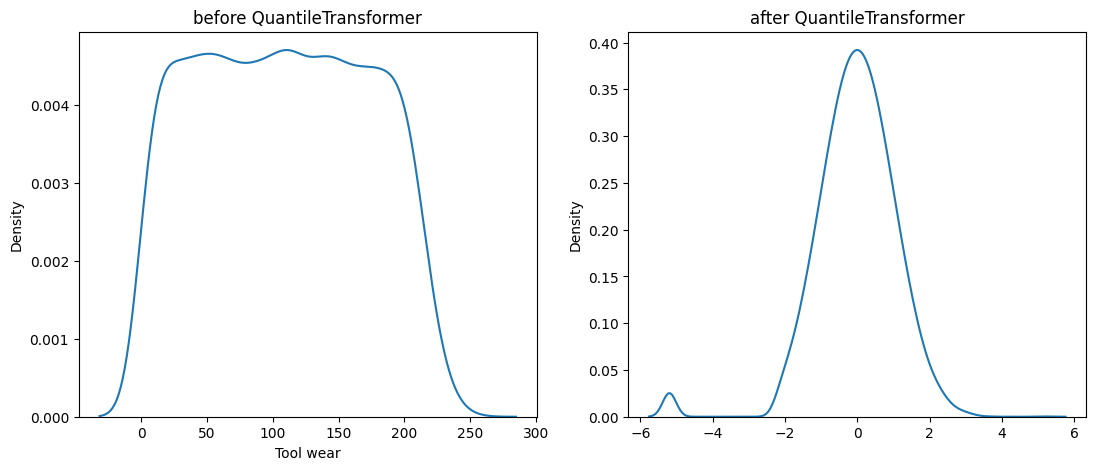

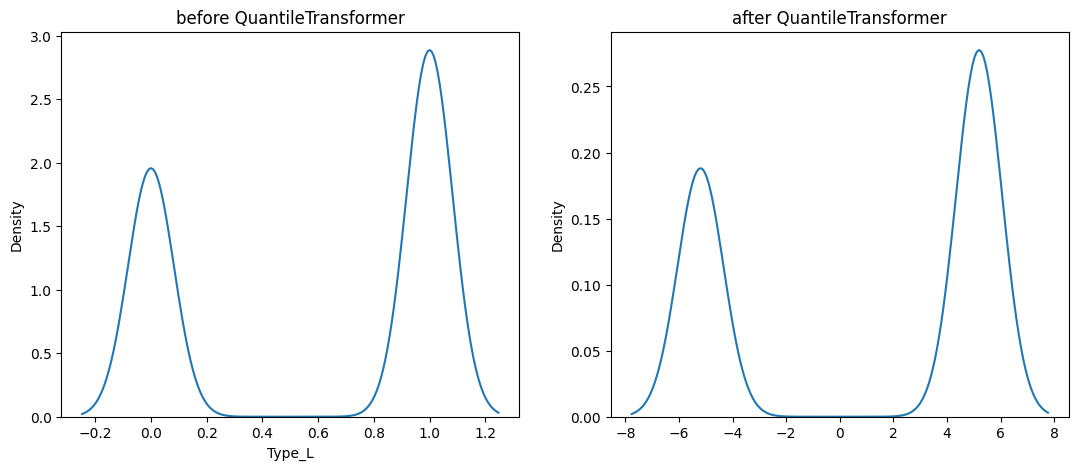

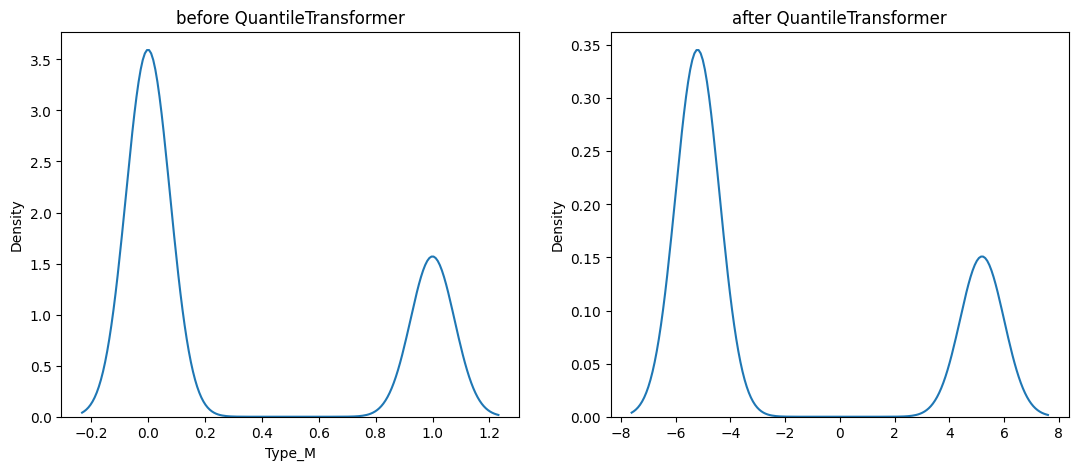

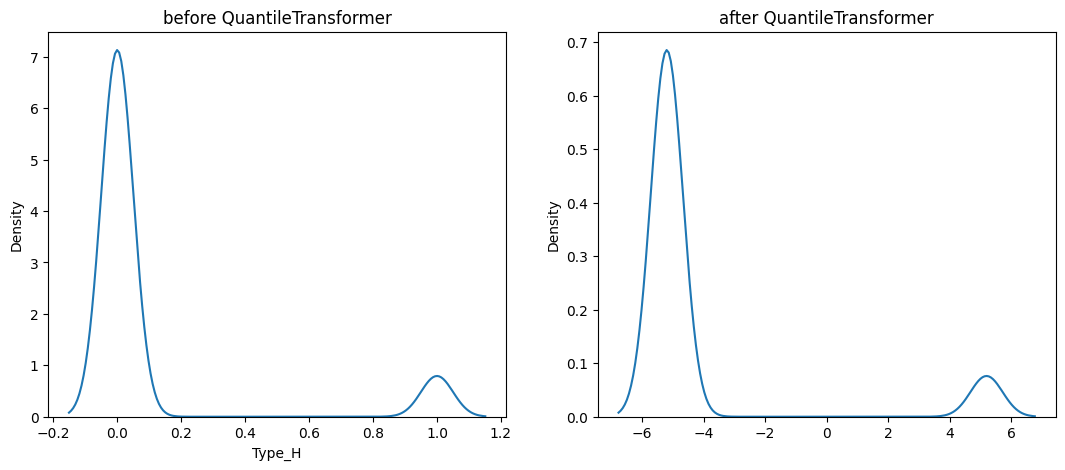

In [ ]:
for col in cols:
    plots(X_train, col, QuantileTransformer(output_distribution='normal'))

In [ ]:
p = QuantileTransformer(output_distribution='normal')
X_train = p.fit_transform(X_train)
X_test = p.transform(X_test)

## Handling Imbalanced Dataset

Imbalanced dataset merupakan masalah yang serius dikarenakan hasil performansi yang dihasilkan ketika imbalanced ini tidak ditangani adalah nilai akurasi yang sangat tinggi, nilai presisi mendekati akurasi, nilai recall yang rendah, dan nilai f1-score yang juga rendah. Hal ini menandakan bahwa model cenderung memprediksi sebagian besar hanya pada kelas mayoritas (biased toward majority class because the high accuration score and its value close to precision score). 

Handling imbalanced dataset kali ini menggunakan teknik oversampling untuk menghindari hilangnya data jika menggunakan teknik downsampling. 
Random Oversampling secara random melakukan duplikasi dari contoh pada kelas minoritas.

SMOTE tidak dapat digunakan pada kasus kali ini dikarenakan ada kelas yang memiliki anggota hanya 1. Oleh karena itu, akan digunakan RandomOverSampler

In [ ]:
oversamp = RandomOverSampler()

In [ ]:
X_train_res,y_train_res = oversamp.fit_resample(X_train, y_train)

## Extreme Gradient Boosting

Btw jadinya paling bagus ternyata XGB. Kalo kalian nemu yang lain gapapa coba aja. Di sini cuma aku kasih XGB. 

Tadi aku coba RandomForestClassifier, KNeighborsClassifiers, MLPClassifiers tiga tiganya emang ok tapi waktu aku coba di data test gitu jelek bggtttt. Sama aku juga dah nyoba bandingin dia pake handling imbalanced class dan ngga ternyata tetep bagus kalo handling imbalanced class, misal ngga dihandling nanti bias ke class 0.

**WHY XGBOOST???**

---

Based on what we've found:

Beberapa penelitian menemukan bahwa ensemble technique dapat meningkatkan classification performance serta peningkatan deteksi kelas outlier minoritas. Terdapat tiga macam ensemble methods, yaitu: Bagging, Boosting, dan Stacking.

Boosting works on a class of weak learners, kemudian meningkatkannya menjadi strong learners. Peningkatan dilakukan secara berurutan di mana contoh yang salah diklasifikasikan akan diberi lebih banyak bobot sehingga selama pelatihan berikutnya, the learner akan lebih menekankan dalam mengoreksi contoh yang sebelumnya salah kelas.

XGBoost adalah decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. Dalam prediksi yang melibatkan data tidak terstruktur (gambar, teks, dll.) neural network cenderung mengungguli semua algoritma. Namun, ketika menyangkut data terstruktur / tabular kecil hingga menengah, decision tree based algorithms dianggap terbaik di kelasnya saat ini.

XGBoost menawarkan beberapa advanced features for model tuning, computing environments, and algorithm enhancement. XGBoost termasuk robust untuk mendukung dilakukannya fine tuning dan penambahan parameter regularisasi. XGBoost akan meningkatkan gradient boosting framework dengan waktu yang relatif cepat dan dapat meningkatkan performansinya.

**Extreme Gradient Boosting**

In [ ]:
modelxgb = XGBClassifier(random_state=42)
modelxgb.fit(X_train_res, y_train_res)
xgb_pred = modelxgb.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2422
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.65      0.73      0.69        15
           4       0.55      0.71      0.62        17
           5       0.00      0.00      0.00         4
           6       0.82      0.70      0.76        20
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       0.17      0.18      0.17        11
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0

    accuracy                           0.98      2500
   macro avg       0.26      0.28      0.27      2500
weighted avg       0.97      0.98      0.97      2500



In [ ]:
accuracy_xgb = accuracy_score(y_test, xgb_pred) 
precision_xgb = precision_score(y_test, xgb_pred, average='macro') 
recall_xgb = recall_score(y_test, xgb_pred, average='macro') 
f1_xgb = f1_score(y_test, xgb_pred, average='macro') 

print("Macro-average quality numbers")
print("Accuracy: {:.4f}".format(accuracy_xgb))
print("Precision: {:.4f}".format(precision_xgb))
print("Recall: {:.4f}".format(recall_xgb))
print("F1-Score: {:.4f}".format(f1_xgb))

Macro-average quality numbers
Accuracy: 0.9752
Precision: 0.2643
Recall: 0.2760
F1-Score: 0.2686


In [ ]:
# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(modelxgb.score(X_train_res, y_train_res)))
print('Test set score: {:.4f}'.format(modelxgb.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9752


Cross Validation

In [ ]:
precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')

In [ ]:
xgb_cv_a = cross_val_score(modelxgb, X_train_res, y_train_res, cv=5)
xgb_cv_p = cross_val_score(modelxgb, X_train_res, y_train_res, scoring=precision, cv=5)
xgb_cv_r = cross_val_score(modelxgb, X_train_res, y_train_res, scoring=recall, cv=5)
xgb_cv_f1 = cross_val_score(modelxgb, X_train_res, y_train_res, scoring=f1,cv=5)
print("Accuracy with cross-validation: %.4f with standard deviation %.2f" % (xgb_cv_a.mean(), xgb_cv_a.std()))
print("Precision with cross-validation: %.4f with standard deviation %.2f" % (xgb_cv_p.mean(), xgb_cv_p.std()))
print("Recall with cross-validation: %.4f with standard deviation %.2f" % (xgb_cv_r.mean(), xgb_cv_r.std()))
print("F1-Score with cross-validation: %.4f with standard deviation %.2f" % (xgb_cv_f1.mean(), xgb_cv_f1.std()))

Accuracy with cross-validation: 0.9990 with standard deviation 0.00
Precision with cross-validation: 0.9990 with standard deviation 0.00
Recall with cross-validation: 0.9990 with standard deviation 0.00
F1-Score with cross-validation: 0.9990 with standard deviation 0.00



# Feature Selection

Proses feature selection kali ini akan menggunakan penggabungan dari berbagai macam cara feature selection yang ada dan melakukan voting fitur mana yang merupakan fitur terpilih dari setiap cara. 

In [ ]:
train = data1[['Air temperature',
         'Process temperature',
         'Rotational speed',
         'Torque',
         'Tool wear',
         'Type_L',
         'Type_M',
         'Type_H']]
target = data1['powerlabel 2']
train.head(2)

Air temperature  Process temperature  Rotational speed  Torque  Tool wear  \
0              298                  308              1551      42          0   
1              298                  308              1408      46          3   

   Type_L  Type_M  Type_H  
0       0       1       0  
1       1       0       0

In [ ]:
num_features_opt = 7   # banyaknya feature yang akan dipilih pada akhir
num_features_max = 8   # banyaknya feature yang dipilih pada tiap bagian
features_best = []

## FS with the Pearson correlation

Pada bagian ini akan dilakukan feature selection menggunakan korelasi pearson. Nilai yang dihasilkan pada Pearson’s terletak pada [-1;1], untuk nilai -1 yang berarti korelasi negatif sempurna, +1 berarti korelasi positif sempurna, dan 0 yang berarti tidak ada korelasi linier antara kedua variabel tersebut. 

Akan ditentukan ambang batas nilai korelasi sebesar 0.9 yang akan digunakan untuk melakukan feature selection.

In [ ]:
# Threshold adalah ambang batas nilai korelasi
threshold = 0.9

def highlight(value):
    if value > threshold:
        style = 'background-color: black'
    else:
        style = 'background-color: blue'
    return style

# Absolute value correlation matrix
corr_matrix = data1.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.style.format("{:.2f}").applymap(highlight)

In [ ]:
#menyeleksi kolom yang memiliki nilai korelasi di atas nilai ambang batas
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
features_filtered = data1.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])
features_best.append(features_filtered.columns.tolist())

The number of features that passed the collinearity threshold:  18


## FS by the SelectFromModel with LinearSVC

SelectFromModel adalah meta-transformator yang dapat digunakan bersama estimator apa pun yang menetapkan kepentingan untuk setiap fitur melalui atribut tertentu (seperti coef_, feature_importances_) atau melalui importance_getter. Fitur dianggap tidak penting dan dihapus jika nilai fitur berada di bawah parameter ambang batas yang disediakan. Selain menentukan ambang batas secara numerik, ada heuristik bawaan untuk menemukan ambang batas menggunakan argumen string.

SelectFromModel menggunakan Linear Support Vector Classification.

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(train, target)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

## FS by the SelectFromModel with Lasso

SelectFromModel adalah meta-transformator yang dapat digunakan bersama estimator apa pun yang menetapkan kepentingan untuk setiap fitur melalui atribut tertentu (seperti coef_, feature_importances_) atau melalui importance_getter. Fitur dianggap tidak penting dan dihapus jika nilai fitur berada di bawah parameter ambang batas yang disediakan. Selain menentukan ambang batas secara numerik, ada heuristik bawaan untuk menemukan ambang batas menggunakan argumen string.

SelectFromModel menggunakan Lasso Regression.

Lasso adalah singkatan dari Least Absolute Shrinkage and Selection Operator. Merupakan jenis regresi linier yang menggunakan penyusutan (shrinkage). Penyusutan adalah tempat nilai data menyusut menuju titik pusat, seperti rata-rata. Lasso adalah regularization constraint yang diperkenalkan pada fungsi objektif model linier untuk mencegah overfitting model prediktif ke data.

Lasso regularization memiliki kemampuan untuk mengatur beberapa koefisien menjadi nol. Hal ini berarti bahwa Lasso dapat digunakan untuk feature selection. Jika koefisien yang mengalikan beberapa fitur adalah 0, kita dapat dengan aman menghapus fitur tersebut dari data. Sisanya adalah fitur penting dalam data.

In [ ]:
lasso = LassoCV(cv=3).fit(train, target)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

## FS by the SelectKBest with Chi-2

SelectKBest merupakan salah satu feature selection univariat yang bekerja dengan memilih fitur terbaik berdasarkan uji statistik univariat. SelectKBest dapat dilihat sebagai langkah prapemrosesan ke estimator. SelectKBest bekerja dengan menghapus semua kecuali k fitur dengan skor tertinggi.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(train, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score')) 

               Feature         Score
4            Tool wear  14237.454212
2     Rotational speed  10017.317430
3               Torque   1442.274903
6               Type_M     25.209251
7               Type_H     22.555342
5               Type_L     19.718000
0      Air temperature      2.707353
1  Process temperature      0.259429


## FS by the Recursive Feature Elimination (RFE) with Logistic Regression

Feature selection menggunakan RFE bertujuan untuk memilih fitur dengan mempertimbangkan secara rekursif set fitur yang lebih kecil dan lebih kecil. 

Pertama, estimator dilatih pada set fitur awal dan setiap fitur yang penting diperoleh baik melalui atribut tertentu (seperti coef_, feature_importances_) atau dipanggil secara tersendiri. Kemudian, fitur yang paling tidak penting dipangkas dari serangkaian fitur saat ini. Prosedur itu diulangi secara rekursif pada set yang dipangkas sampai jumlah fitur yang diinginkan untuk dipilih akhirnya tercapai.

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(train, target)
rfe_support = rfe_selector.get_support()
rfe_feature = train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

8 selected features


In [ ]:
features_best.append(rfe_feature)

## FS by the Recursive Feature Elimination (RFE) with Random Forest

In [ ]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
embeded_rf_selector.fit(train, target)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200),
                threshold='1.25*median')

In [ ]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

3 selected features


In [ ]:
features_best.append(embeded_rf_feature)

## FS by the VarianceThreshold

VarianceThreshold adalah pendekatan dasar sederhana untuk feature selection. VarianceThreshold menghapus semua fitur yang variansnya tidak memenuhi ambang batas. Secara default, VarianceThreshold menghapus semua fitur varians nol, yaitu fitur yang memiliki nilai yang sama di semua sampel.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Check whether all features have a sufficiently different meaning
selector = VarianceThreshold(threshold=10)
np.shape(selector.fit_transform(train))
features_best.append(list(np.array(train.columns)[selector.get_support(indices=False)]))

## Selection the best features

In [ ]:
features_best

[['UDI',
  'Product ID',
  'Air temperature',
  'Process temperature',
  'Rotational speed',
  'Torque',
  'Tool wear',
  'Machine failure',
  'TWF',
  'HDF',
  'PWF',
  'OSF',
  'RNF',
  'Type_H',
  'Type_L',
  'Type_M',
  'Another Failure',
  'powerlabel'],
 ['Air temperature',
  'Process temperature',
  'Rotational speed',
  'Torque',
  'Tool wear',
  'Type_L',
  'Type_M',
  'Type_H'],
 ['Air temperature', 'Rotational speed', 'Torque', 'Tool wear'],
 ['Tool wear',
  'Rotational speed',
  'Torque',
  'Type_M',
  'Type_H',
  'Type_L',
  'Air temperature',
  'Process temperature'],
 ['Air temperature',
  'Process temperature',
  'Rotational speed',
  'Torque',
  'Tool wear',
  'Type_L',
  'Type_M',
  'Type_H'],
 ['Rotational speed', 'Torque', 'Tool wear'],
 ['Rotational speed', 'Torque', 'Tool wear']]

In [ ]:
# Most common items in all lists of optimal features
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in data1.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False).head(num_features_opt)

Num
Rotational speed       7
Torque                 7
Tool wear              7
Air temperature        5
Process temperature    4
Type_M                 4
Type_L                 4

In [ ]:
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()
if not 'powerlabel' in main_cols:
    main_cols.append('powerlabel 2')
main_cols

['Rotational speed',
 'Torque',
 'Tool wear',
 'Air temperature',
 'Process temperature',
 'Type_H',
 'Type_L',
 'powerlabel 2']

In [ ]:
pd.set_option("display.max_columns", 100)
len(main_cols)

8

## Fixed data with feature selection

In [ ]:
new_data = data1[main_cols]

In [ ]:
new_data

Rotational speed  Torque  Tool wear  Air temperature  \
0                 1551      42          0              298   
1                 1408      46          3              298   
2                 1498      49          5              298   
3                 1433      39          7              298   
4                 1408      40          9              298   
...                ...     ...        ...              ...   
9995              1604      29         14              298   
9996              1632      31         17              298   
9997              1645      33         22              299   
9998              1408      48         25              299   
9999              1500      40         30              299   

      Process temperature  Type_H  Type_L  powerlabel 2  
0                     308       0       0             0  
1                     308       0       1             0  
2                     308       0       1             0  
3                     308       0       1             0  
4                     308       0       1             0  
...                   ...     ...     ...           ...  
9995                  308       0       0             0  
9996                  308       1       0             0  
9997                  308       0       0             0  
9998                  308       1       0             0  
9999                  308       0       0             0  

[10000 rows x 8 columns]

# Fix Model (Best Parameter With Hyperparameter Tuning)

Untuk hyperparameter tuning, digunakan fitur hasil dari feature selection. Oleh karena itu pendefinisian variabel dependen dan independen serta pengambilan keputusan train test split yang digunakan akan diulang kembali demi mendapatkan hasil maksimal.

## Splitting Dataset

In [ ]:
X2 = new_data.drop(['powerlabel 2'], axis=1)
y2 = new_data['powerlabel 2']

In [ ]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X2_train, X2_test, y2_train, y2_test = train_test_split (X2, y2, test_size=size, random_state=42)
    xgb_clf = XGBClassifier ()
    xgb_clf.fit(X2_train, y2_train)
    score.append (xgb_clf.score (X2_test, y2_test))

# Create a dataframe to display the results 
r = pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
print(r)

   Test size     Score
1       0.25  0.979200
2       0.30  0.978667
0       0.20  0.976500


Berdasarkan hasil di atas akan digunakan pembagian data train dan data test sebanyak 75% data training dan 25% data testing

In [ ]:
train2_data, test2_data = train_test_split(data1, test_size=0.25, random_state=42)
test2_data.to_csv("test2.csv")
train2_data.to_csv("train2.csv")

In [ ]:
train2 = pd.read_csv('train2.csv')
X2_train = train2[['Air temperature',
           'Process temperature',
           'Rotational speed',
           'Torque',
           'Tool wear',
           'Type_L',
           'Type_H']]
y2_train = train2[['powerlabel 2']]

test2 = pd.read_csv('test2.csv')
X2_test = test2[['Air temperature',
           'Process temperature',
           'Rotational speed',
           'Torque',
           'Tool wear',
           'Type_L',
           'Type_H']]
y2_test = test2[['powerlabel 2']]

print("Number of training data ", train2.shape[0])
print("Number of testing data: ", test2.shape[0])

Number of training data  7500
Number of testing data:  2500


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 42)

## Transformation

In [ ]:
p = QuantileTransformer(output_distribution='normal')
X2_train = p.fit_transform(X2_train)
X2_test = p.transform(X2_test)

## Handling Imbalanced Dataset

Imbalanced dataset merupakan masalah yang serius dikarenakan hasil performansi yang dihasilkan ketika imbalanced ini tidak ditangani adalah nilai akurasi yang sangat tinggi, nilai presisi mendekati akurasi, nilai recall yang rendah, dan nilai f1-score yang juga rendah. Hal ini menandakan bahwa model cenderung memprediksi sebagian besar hanya pada kelas mayoritas (biased toward majority class because the high accuration score and its value close to precision score). 

Handling imbalanced dataset kali ini menggunakan teknik oversampling untuk menghindari hilangnya data jika menggunakan teknik downsampling. 
Random Oversampling secara random melakukan duplikasi dari contoh pada kelas minoritas.

SMOTE tidak dapat digunakan pada kasus kali ini dikarenakan ada kelas yang memiliki anggota hanya 1. Oleh karena itu, akan digunakan RandomOverSampler

In [ ]:
oversamp = RandomOverSampler()

In [ ]:
X2_train_res,y2_train_res = oversamp.fit_resample(X2_train, y2_train)

## HYPEROPT

p.s. Buat ini karena kayaknya tiap ngerun beda hasil jadi langsung aja ambil hasil parameter terbaiknya, gausah dirun ulang biar sama semua. Diusahain jangan kerun ulang yah gais di collab ini biar hasilnya ga beda :(


Umumnya, terdapat dua cara yang biasa digunakan dalam mengontrol overfitting pada XGBoost
1. Mengontrol kompleksitas model secara langsung (max_depth, min_child_weight, dan gamma).
2. Menambahkan randomiasi untuk membuat data training robust terhadap noise (subsample, colsample_bytree, atau mengurangi nilai eta dan menambah num_round).

Parameter:
*   n_estimators: Jumlah pohon dalam model. Nilai yang lebih tinggi berarti lebih banyak weak learners yang berkontribusi terhadap hasil akhir, tetapi meningkatkannya secara signifikan dapat memperlambat waktu pelatihan.
*   max_depth: Parameter yang menentukan kompleksitas algoritma. Digunakan untuk mengontrol over-fitting karena semakin dalam kedalaman model akan memungkinkan model untuk mempelajari hubungan yang sangat spesifik pada sampel tertentu.  
*   gamma: Gamma menentukan minimum loss reduction yang diperlukan untuk melakukan split. Semakin tinggi nilainya, semakin tinggi kekuatan regularisasi, semakin rendah kemungkinan overfitting (tetapi bisa underfit jika terlalu besar)
*   reg_alpha: Istilah regularisasi L1 pada bobot.
*   reg_lambda: Istilah regularisasi L2 pada bobot. Digunakan untuk menangani bagian regularisasi XGBoost.
*   min_child_weight: Jumlah minimum bobot dari semua pengamatan yang diperlukan pada anak. Digunakan untuk mengontrol over-fitting. Nilai yang lebih tinggi mencegah model mempelajari hubungan yang mungkin sangat spesifik untuk sampel tertentu yang dipilih untuk pohon.
*   colsample_bytree: Menunjukkan fraksi kolom menjadi sampel acak untuk setiap pohon. Setiap pohon mungkin menggunakan serangkaian fitur yang berbeda untuk prediksi dan karenanya mengurangi kemungkinan overfitting dan juga meningkatkan kecepatan pelatihan karena tidak semua fitur digunakan di setiap pohon. 

reg_alpha(L1) dan reg_lambda(L2) yang digunakan bersamaan memiliki perannya masing - masing, yaitu L1 untuk menghukum fitur yang kurang prediktif, tetapi kemudian juga beberapa L2 untuk menghukum lebih lanjut large leaf scores tanpa terlalu keras pada fitur yang kurang prediktif.








In [ ]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hyperopt import hp
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,5),
        'reg_alpha' : hp.quniform('reg_alpha', 10,50,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf_ht=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    reg_lambda = int(space['reg_lambda']),colsample_bytree=int(space['colsample_bytree']),
                    random_state=42)
    
    evaluation = [( X2_train_res, y2_train_res), ( X2_test, y2_test)]
    
    clf_ht.fit(X2_train_res, y2_train_res,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf_ht.predict(X2_test)
    accuracy = accuracy_score(y2_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

[10:57:26] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[10:57:26] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[10:57:27] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[10:57:27] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[10:57:27] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[10:57:28] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[10:57:28] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[10:57:28] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[10:57:29] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8982841317992685, 'gamma': 1.0804272435194382, 'max_depth': 15.0, 'min_child_weight': 3.0, 'reg_alpha': 10.0, 'reg_lambda': 0.4667958201667428}


## Extreme Gradient Boosting

In [ ]:
modelxgb2 = XGBClassifier(colsample_bytree= 0.8982841317992685, gamma= 1.0804272435194382, max_depth= 15, min_child_weight= 3, reg_alpha= 10, reg_lambda= 0.4667958201667428, random_state=42)
modelxgb2.fit(X2_train_res, y2_train_res)
xgb2_pred_proba = modelxgb2.predict_proba(X2_test)
xgb2_pred = modelxgb2.predict(X2_test)

# Fix Model Evaluation

## PyCm

Ini gausah diinterpret karna ga dipake juga nanti

In [ ]:
!pip install pycm==3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.6/597.6 kB 15.1 MB/s eta 0:00:00


In [ ]:
import pycm
from pycm import *

In [ ]:
y2n_test=y2_test.to_numpy()

In [ ]:
cm = ConfusionMatrix(actual_vector=y2n_test, predict_vector=xgb2_pred)

In [ ]:
cm.stat(summary=True)

Overall Statistics : 

ACC Macro                                                         0.99237
F1 Macro                                                          0.22018
FPR Macro                                                         0.02199
Kappa                                                             0.44498
NPV Macro                                                         0.95214
Overall ACC                                                       0.9504
PPV Macro                                                         None
SOA1(Landis & Koch)                                               Moderate
TPR Macro                                                         None
Zero-one Loss                                                     124

Class Statistics :

Classes                                                           0             1             2             3             4             5             6             7             8             9             10            11    

## Performance

In [ ]:
#Classification Report
print(metrics.classification_report(y2_test, xgb2_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2422
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.48      0.73      0.58        15
           4       0.48      0.82      0.61        17
           5       0.00      0.00      0.00         4
           6       0.38      0.80      0.52        20
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       0.11      0.45      0.18        11
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0

    accuracy                           0.95      2500
   macro avg       0.19      0.29      0.22      2500
weighted avg       0.97      0.95      0.96      2500



In [ ]:
# Check for overfitting and underfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(modelxgb2.score(X2_train_res, y2_train_res)))
print('Test set score: {:.4f}'.format(modelxgb2.score(X2_test, y2_test)))

Training set score: 0.9979
Test set score: 0.9504


## Cross Validation

In [ ]:
precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')

In [ ]:
xgb2_cv_a = cross_val_score(modelxgb2, X2_train_res, y2_train_res, cv=5)
xgb2_cv_p = cross_val_score(modelxgb2, X2_train_res, y2_train_res, scoring=precision, cv=5)
xgb2_cv_r = cross_val_score(modelxgb2, X2_train_res, y2_train_res, scoring=recall, cv=5)
xgb2_cv_f1 = cross_val_score(modelxgb2, X2_train_res, y2_train_res, scoring=f1,cv=5)
print("Accuracy with cross-validation: %.4f with standard deviation %.2f" % (xgb2_cv_a.mean(), xgb2_cv_a.std()))
print("Precision with cross-validation: %.4f with standard deviation %.2f" % (xgb2_cv_p.mean(), xgb2_cv_p.std()))
print("Recall with cross-validation: %.4f with standard deviation %.2f" % (xgb2_cv_r.mean(), xgb2_cv_r.std()))
print("F1-Score with cross-validation: %.4f with standard deviation %.2f" % (xgb2_cv_f1.mean(), xgb2_cv_f1.std()))

Accuracy with cross-validation: 0.9965 with standard deviation 0.00
Precision with cross-validation: 0.9965 with standard deviation 0.00
Recall with cross-validation: 0.9965 with standard deviation 0.00
F1-Score with cross-validation: 0.9964 with standard deviation 0.00


## Confusion Matrix

**How to Build Multiclass Confusion Matrix**

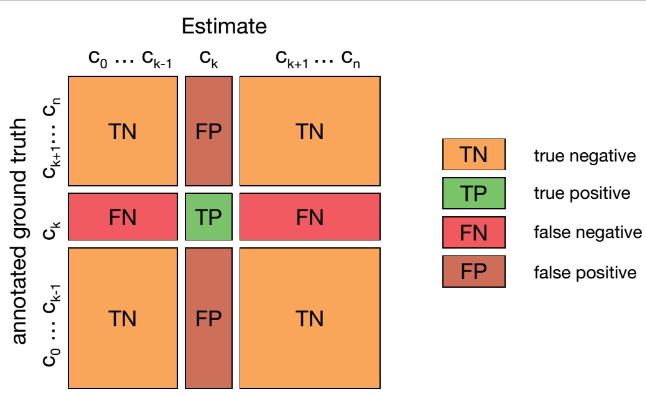

<Axes: title={'center': 'Extreme Gradient Boosting'}>

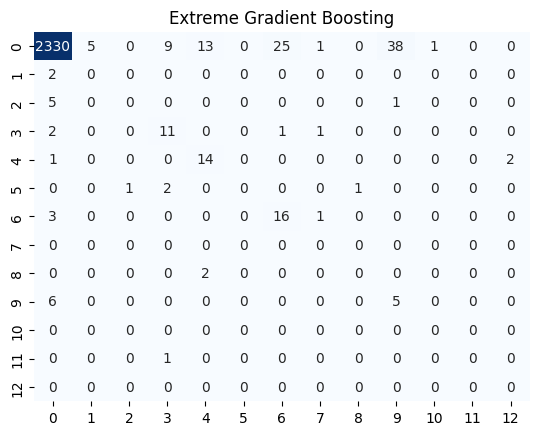

In [ ]:
cm_xgb2 = confusion_matrix(y2_test, xgb2_pred)
plt.title("Extreme Gradient Boosting")
sns.heatmap(cm_xgb2, annot=True, cmap="Blues", fmt="d", cbar=False)

In [ ]:
FP = cm_xgb2.sum(axis=0) - np.diag(cm_xgb2)  
FN = cm_xgb2.sum(axis=1) - np.diag(cm_xgb2)
TP = np.diag(cm_xgb2)
TN = cm_xgb2.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
FPR

array([0.24358974, 0.0020016 , 0.00040096, 0.00482897, 0.00604108,
       0.        , 0.01048387, 0.0012    , 0.00040032, 0.01566894,
       0.0004    , 0.        , 0.0008    ])

In [ ]:
TPR

array([0.96201486, 0.        , 0.        , 0.73333333, 0.82352941,
       0.        , 0.8       ,        nan, 0.        , 0.45454545,
              nan, 0.        ,        nan])

TPR (True Positive Rate) menentukan berapa banyak hasil positif yang benar terjadi di antara semua sampel positif yang tersedia selama tes. FPR (False Positive Rate) menentukan berapa banyak hasil positif yang salah terjadi di antara semua sampel negatif yang tersedia selama tes.

Model yang baik adalah model yang memiliki nilai FPR rendah dan nilai TPR tinggi. Kami tidak menginginkan model memprediksi suatu mesin dikatakan rusak padahal aslinya tidak rusak. Oleh karena itu, secara khusus kami akan melihat nilai FPR dan TPR dari setiap kelas. Bisa dilihat berdasarkan output di atas bahwa nilai FPR sudah cukup rendah dan nilai TPR sudah cukup tinggi. Akan tetapi, untuk beberapa kelas yang tidak memiliki anggota atau hanya berisi sedikit anggota nilainya cenderung tidak ada atau rendah (0,1,2). Hal tersebut mungkin terjadi karena ketika mesin salah melakukan prediksi maka tidak ada satupun data yang berhasil diprediksi.

Berdasarkan kedua nilai tersebut dan beberapa kondisi yang telah disebutkan, kami menyimpulkan bahwa model telah melakukan prediksi dengan baik.

# Data Testing

In [ ]:
# 9.4. Joining the raw data witht the predictions
output = test2.copy()
output['Type'] = 'Empty'
output['Type'][output['Type_H'] == 1] = 'Type H'
output['Type'][output['Type_L'] == 1] = 'Type L'
output['Type'][output['Type_M'] == 1] = 'Type M'
output['Predictions - Failure or Not'] = xgb2_pred
output['Predictions - Failure or Not Desc'] = 'Empty'
output['Predictions - Failure or Not Desc'][output['Predictions - Failure or Not'] == 0] = 'Does not Fail'
output['Predictions - Failure or Not Desc'][output['Predictions - Failure or Not'] != 0] = 'Fail'
output['Predictions - Probability to Failure'] = xgb2_pred_proba[:,1]
output['Predictions - Type of Failure'] = 'Empty'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 0] = 'Does not Fail'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 1] = 'Another Failure'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 2] = 'RNF'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 3] = 'OSF'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 4] = 'PWF'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 5] = 'PWF & OSF'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 6] = 'HDF'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 7] = 'HDF & OSF'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 8] = 'HDF & PWF'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 9] = 'TWF'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 10] = 'TWF & RNF'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 11] = 'TWF & OSF'
output['Predictions - Type of Failure'][output['Predictions - Failure or Not'] == 12] = 'TWF, PWF, & OSF'

In [ ]:
#define conditions
conditions = [
    (output['Predictions - Failure or Not Desc'] == 'Fail') & (output['Type_L'] == 1),
    (output['Predictions - Failure or Not Desc'] == 'Fail') & (output['Type_M'] == 1),
    (output['Predictions - Failure or Not Desc'] == 'Fail') & (output['Type_H'] == 1)
]

#define results
results = ['Type L', 'Type M', 'Type H']

#create new column based on conditions in column1 and column2
output['Predictions - Machine Type'] = np.select(conditions, results)

In [ ]:
output.to_excel('Machine Failure Predictions Output.xlsx')